# Imports, etc.

This'll be how pretty much every try at data analysis with pandas will look like

In [15]:
# Import numpy, pandas, DataFrame, and Series.
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some pandas options.
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# Some items for matplotlib.
# CHANGES HAVE BEEN MADE FROM THE BOOK DUE TO NEWER SOFTWARE.
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
%matplotlib inline

# The pandas `Series` Object

Using pandas means spending much of your time with two kinds of objects provided by pandas, DataFrame and Series.

In [77]:
# Create a four-item Series.
s = Series([1, 2, 3, 4])
print(type(s))
print(s)

<class 'pandas.core.series.Series'>
0    1
1    2
2    3
3    4
dtype: int64


The left column in the printed Series is the index of each element. The right column are the elements themselves. All elements in a Series must be of the same type. Varies of different types will be coerced appropriately.

Accessing elements by index isn't terribly different, but double brackets are required. It's important to remember that the bracket notation below is referring the values of the indicies insofar as they can be conceived as labels, rather than as zero-based positions.

In [78]:
# Return a Series with the rows having the indicies 1 and 3.
print(s[[1, 3]])
print(type(s[[1, 3]]))

1    2
3    4
dtype: int64
<class 'pandas.core.series.Series'>


The elements in a Series object can be given custom labels. The lengths of the lists used for elements and labels must be identical.

In [79]:
s = Series(
    [1, 2, 3, 4],
    index = ['a', 'b', 'c', 'd']
)

print(s)

a    1
b    2
c    3
d    4
dtype: int64


The new labels can be used to return elements. Numeric indicies can still be used, though.

In [80]:
print(s[['a', 'd']])
print(s[[0, 3]])

a    1
d    4
dtype: int64
a    1
d    4
dtype: int64


It's possible to access directly the indicies and basic `numpy` array of a `Series` object.

In [81]:
print(s.index)
print(type(s.index))
print(s.values)
print(type(s.values))

Index(['a', 'b', 'c', 'd'], dtype='object')
<class 'pandas.core.index.Index'>
[1 2 3 4]
<class 'numpy.ndarray'>


pandas has the ability to create special time series objects where dates can be used as labels, created by using the `pd.date_range()` method. Dates are in ISO YYYY-MM-DD format.

The start and end dates defined are inclusive.

In [82]:
# Create a Series with a range of dates as labels.
dates = pd.date_range('2014-07-01', '2014-07-6')
print(type(dates))
for d in dates:
    print(d)

<class 'pandas.tseries.index.DatetimeIndex'>
2014-07-01 00:00:00
2014-07-02 00:00:00
2014-07-03 00:00:00
2014-07-04 00:00:00
2014-07-05 00:00:00
2014-07-06 00:00:00


Such an index is of little use on its own, but it can be assigned to another Series and there used as a special kind of label.

In [83]:
# Create a series of floats that represent temperatures.
temps1 = Series([80, 82, 85, 90, 83, 87], index = dates)

print(type(temps1))
print(temps1)

<class 'pandas.core.series.Series'>
2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, dtype: int64


Touching on the realm of statistics, some convenience functions are available through `pandas`, thanks to being built on top of `numpy`, but by no means should one assume that `pandas` is capable of real stats.

In [84]:
print(temps1.mean())

84.5


pandas can do element-wise arithmetic, as one would expect.

In [85]:
temps2 = Series([70, 75, 69, 83, 79, 77], index = dates)
print(temps2)

temp_diffs = temps1 - temps2
print(temp_diffs)

2014-07-01    70
2014-07-02    75
2014-07-03    69
2014-07-04    83
2014-07-05    79
2014-07-06    77
Freq: D, dtype: int64
2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64


A time series index can still be accessed numerically.

In [86]:
print(temp_diffs[2])

16


# The pandas `DataFrame` Object

Here's where things get cool and interesting. A `DataFrame` object in pandas is very much like the kind found in R. It's analogous to a database table, with labels for rows (observations) and columns (variables), which themselves are Series objects.

A `DataFrame` can be creted by putting together multiple `Series`.

In [87]:
# Combine temps1 and temps2 into a two-dimensional DataFrame
# and assign them some names.
temps_df = DataFrame(
    {'Missoula': temps1, 'Philadelphia': temps2}
)

print(type(temps_df))
print(temps_df)

<class 'pandas.core.frame.DataFrame'>
            Missoula  Philadelphia
2014-07-01        80            70
2014-07-02        82            75
2014-07-03        85            69
2014-07-04        90            83
2014-07-05        83            79
2014-07-06        87            77


Passing a column label returns returns the relevent `Series`.

In [88]:
print(type(temps_df['Missoula']))
print(temps_df['Missoula'])
print()
print(type(temps_df['Philadelphia']))
print(temps_df['Philadelphia'])

<class 'pandas.core.series.Series'>
2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

<class 'pandas.core.series.Series'>
2014-07-01    70
2014-07-02    75
2014-07-03    69
2014-07-04    83
2014-07-05    79
2014-07-06    77
Freq: D, Name: Philadelphia, dtype: int64


A list of labels can be passed, returning another `DataFrame`. The list elements can be in any order and they will be returned in kind. Notice the extra brackets.

In [89]:
print(type(temps_df[['Philadelphia', 'Missoula']]))
print(temps_df[['Philadelphia', 'Missoula']])

<class 'pandas.core.frame.DataFrame'>
            Philadelphia  Missoula
2014-07-01            70        80
2014-07-02            75        82
2014-07-03            69        85
2014-07-04            83        90
2014-07-05            79        83
2014-07-06            77        87


Conveniently, if a column label has no spaces, it can be accessed like an object property.

In [90]:
print(type(temps_df.Missoula))
print(temps_df.Missoula)

<class 'pandas.core.series.Series'>
2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64


We can do some arithmetic operations, like so.

In [91]:
# Calculate the temperature differences between the two cities.
print(type(temps_df.Missoula - temps_df.Philadelphia))
print(temps_df.Missoula - temps_df.Philadelphia)

<class 'pandas.core.series.Series'>
2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64


New columns can be added to a `DataFrame` by using array indexer bracket notation.

In [92]:
temps_df['Difference'] = temp_diffs
print(temps_df)

            Missoula  Philadelphia  Difference
2014-07-01        80            70          10
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10


`DataFrame` objects all have a `columns` attribute.

In [93]:
print(type(temps_df.columns))
print(temps_df.columns)

<class 'pandas.core.index.Index'>
Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')


Columns can be sliced.

In [94]:
print(temps_df.Difference[1:4])

2014-07-02     7
2014-07-03    16
2014-07-04     7
Freq: D, Name: Difference, dtype: int64


Rows can be retrieved from a `DataFrame` by using `.loc` (label) and `.iloc` (index) properties.

In [95]:
print(type(temps_df.iloc[1]))
print(temps_df.iloc[1])
print()
print(type(temps_df.loc['2014-07-03']))
print(temps_df.loc['2014-07-03'])

<class 'pandas.core.series.Series'>
Missoula        82
Philadelphia    75
Difference       7
Name: 2014-07-02 00:00:00, dtype: int64

<class 'pandas.core.series.Series'>
Missoula        85
Philadelphia    69
Difference      16
Name: 2014-07-03 00:00:00, dtype: int64


You can give a list of interger positions to retrieve multiple rows from a `DataFrame`.

In [96]:
# Retrieve three specified values from Differences column.
print(temps_df.iloc[[1, 3, 5]].Difference)

2014-07-02     7
2014-07-04     7
2014-07-06    10
Freq: 2D, Name: Difference, dtype: int64


Rows can be selected with logical expressions as well.

In [97]:
# Make a Series of boolean values.
print(temps_df.Missoula > 82)
print()
# Use a logical expression within brackets as a selector.
print(temps_df[temps_df.Missoula > 82])

2014-07-01    False
2014-07-02    False
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: Missoula, dtype: bool

            Missoula  Philadelphia  Difference
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10


# Loading CSV Data from Files

`.csv` support is built into pandas and is basically magic. Some `.csv` files require some settings to be flipped before becoming readable, though.

In [98]:
# Display contents of test1.csv
# Commands are OS dependent.

# POSIX
# !cat data/test1.csv

# Windows
!type data\test1.csv

date,0,1,2
2000-01-01 00:00:00,1.10376250134,-1.90997889703,-0.808955536115
2000-01-02 00:00:00,1.18891664768,0.581119740849,0.86159734949
2000-01-03 00:00:00,-0.964200042412,0.779764393246,1.82906224532
2000-01-04 00:00:00,0.782130444001,-1.72066965573,-1.10824167327
2000-01-05 00:00:00,-1.86701699823,-0.528368292754,-2.48830894087
2000-01-06 00:00:00,2.56928022646,-0.471901478927,-0.835033249865
2000-01-07 00:00:00,-0.39932258251,-0.676426550985,-0.0112559158931
2000-01-08 00:00:00,1.64299299394,1.01341997845,1.43566709724
2000-01-09 00:00:00,1.14730764657,2.13799951538,0.554171306191
2000-01-10 00:00:00,0.933765825769,1.38715526486,-0.560142729978


This information can be imported into a `DataFrame` object easily.

In [99]:
# Read contents into a DataFrame.
# Windows needs that stupid 
df = pd.read_csv(r'data\test1.csv')
print(df)

                  date         0         1         2
0  2000-01-01 00:00:00  1.103763 -1.909979 -0.808956
1  2000-01-02 00:00:00  1.188917  0.581120  0.861597
2  2000-01-03 00:00:00 -0.964200  0.779764  1.829062
3  2000-01-04 00:00:00  0.782130 -1.720670 -1.108242
4  2000-01-05 00:00:00 -1.867017 -0.528368 -2.488309
5  2000-01-06 00:00:00  2.569280 -0.471901 -0.835033
6  2000-01-07 00:00:00 -0.399323 -0.676427 -0.011256
7  2000-01-08 00:00:00  1.642993  1.013420  1.435667
8  2000-01-09 00:00:00  1.147308  2.138000  0.554171
9  2000-01-10 00:00:00  0.933766  1.387155 -0.560143


pandas is great and all, but it couldn't figure out that the date column was supposed to be a time series index. As is, the values in the date column are string type, rather than date. This needs to be addressed while the `DataFrame` is being created.

In [100]:
# Read the file into a DataFrame, properly handling the dates.
# It's necessary to have visually examined the file first.
df = pd.read_csv(r'data\test1.csv', parse_dates=['date'])
print(df)

        date         0         1         2
0 2000-01-01  1.103763 -1.909979 -0.808956
1 2000-01-02  1.188917  0.581120  0.861597
2 2000-01-03 -0.964200  0.779764  1.829062
3 2000-01-04  0.782130 -1.720670 -1.108242
4 2000-01-05 -1.867017 -0.528368 -2.488309
5 2000-01-06  2.569280 -0.471901 -0.835033
6 2000-01-07 -0.399323 -0.676427 -0.011256
7 2000-01-08  1.642993  1.013420  1.435667
8 2000-01-09  1.147308  2.138000  0.554171
9 2000-01-10  0.933766  1.387155 -0.560143


The date column now hold the correct data type, but the dates are still not being used as indicies.

In [101]:
print(type(df.date[0]))
print(df.index)

<class 'pandas.tslib.Timestamp'>
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


The `index_col` parameter will sort this mess out.

In [102]:
df = pd.read_csv(
    r'data\test1.csv',
    parse_dates=['date'],
    index_col='date'
)

df

                   0         1         2
date                                    
2000-01-01  1.103763 -1.909979 -0.808956
2000-01-02  1.188917  0.581120  0.861597
2000-01-03 -0.964200  0.779764  1.829062
2000-01-04  0.782130 -1.720670 -1.108242
2000-01-05 -1.867017 -0.528368 -2.488309
2000-01-06  2.569280 -0.471901 -0.835033
2000-01-07 -0.399323 -0.676427 -0.011256
2000-01-08  1.642993  1.013420  1.435667
2000-01-09  1.147308  2.138000  0.554171
2000-01-10  0.933766  1.387155 -0.560143

In [103]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

# Loading Data from the Web

pandas can also pull data from sources on the Web using the `pandas.data.DataReader` class (and maybe others).

In [2]:
# Imports for reading data from Yahoo! servers.
from pandas.io.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

# Read the last three months of GOOG data into a DataFrame.
goog = DataReader(
    'GOOG',
    'yahoo',
    date.today() + relativedelta(months=-3)
)

# Print the five most recent dates.
goog.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-02-08,667.849976,684.030029,663.059998,682.739990,4212500,682.739990
2016-02-09,672.320007,699.900024,668.770020,678.109985,3604300,678.109985
2016-02-10,686.859985,701.309998,682.130005,684.119995,2627400,684.119995
2016-02-11,675.000000,689.349976,668.867981,683.109985,3007200,683.109985
2016-02-12,690.260010,693.750000,678.599976,682.400024,2129800,682.400024


# Visualization of pandas Data

`pandas` is tightly integrated with `matplotlib`, making plotting easy, if it works. The Yahoo! Finance data can be plotted in a single line.

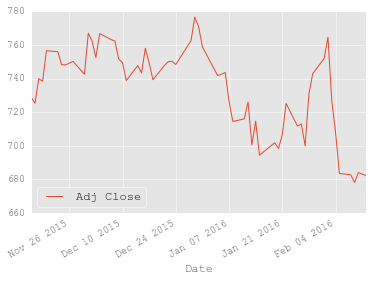

In [14]:
# Plot the Adj Close values against the dates.
goog.plot(y='Adj Close')